# Caso: Predicción de abandono bancario
El conjunto de datos incluye apellidos codificados con etiquetas y características derivadas de ellos utilizando

En el conjunto de datos sintéticos para la clasificación binaria Playground Series S4 E1 con un conjunto de datos de abandono bancario, se han diseñado varias funciones para capturar información relevante sobre los clientes. El conjunto de datos incluye apellidos codificados con etiquetas y características derivadas de ellos utilizando el vectorizador TFIDF. La puntuación crediticia sirve como una representación numérica de la solvencia de un cliente, mientras que la función geográfica indica el país de residencia, con codificación one-hot para Francia, España y Alemania.

El género se representa con codificación one-hot para categorías masculinas y femeninas. La edad, la antigüedad, el saldo y la cantidad de productos utilizados por el cliente ofrecen información sobre su comportamiento bancario. La presencia de una tarjeta de crédito, el estado de membresía activa y el salario estimado también se incluyen como características binarias.

Las características de ingeniería notables brindan información adicional. Mem__no__Products es el producto de la cantidad de productos y el estado de membresía activa, lo que ofrece una métrica combinada. Cred_Bal_Sal representa la relación entre el producto del puntaje crediticio y el saldo por el salario estimado, lo que proporciona una medida relativa de la salud financiera. La relación equilibrio-salario (Bal_sal) y la relación antigüedad-edad (Tenure_Age) ofrecen dimensiones adicionales para el análisis. Finalmente, Age_Tenure_product es una característica que captura la interacción entre la edad y la tenencia.

La variable de destino, 'Salido', indica si un cliente ha abandonado, con un valor de 1 para los clientes abandonados y 0 para los que no. Este conjunto de datos, con su conjunto diverso de características y métricas diseñadas, proporciona una base integral para las tareas de clasificación binaria, lo que permite la exploración de factores que influyen en la pérdida de clientes en el ámbito bancario. Los analistas y científicos de datos pueden aprovechar estas funciones para crear modelos predictivos y obtener información sobre la dinámica de la retención de clientes.

Fuente: https://www.kaggle.com/datasets/willianoliveiragibin/bank-churn-prediction/data

revisar:
1. Artificial_Neural_Networks_Case_Study: https://github.com/TatevKaren/Deep-Learning-for-Data-Science/blob/main/Artificial_Neural_Networks_Case_Study.pdf

2. A Comparative Study using Feature Selection to Predict the
Behaviour of Bank Customers
https://www.e3s-conferences.org/articles/e3sconf/pdf/2020/44/e3sconf_icmed2020_01011.pdf

3.Bank Customer Churn Prediction: https://eudl.eu/pdf/10.4108/eai.2-12-2022.2328745

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install opendatasets sweetviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as opd
import sweetviz as sv

import missingno as msno
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers
from tensorflow.keras import initializers

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Establecer la opción de visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
# opd.download("https://www.kaggle.com/datasets/willianoliveiragibin/bank-churn-prediction/data",
#              "/content/drive/Othercomputers/Jesús - Laptop HP/Data Science/PEA Deep Learning for Data Science Professional - URP/7) Clase 6 - 29 02 2024")

In [ ]:
# Cargar datos
path = "/content/drive/Othercomputers/Jesús - Laptop HP/Data Science/PEA Deep Learning for Data Science Professional - URP/7) Clase 6 - 29 02 2024/bank-churn-prediction/friance new.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
# Mostar datos
display(df.head())
print(df.shape)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


(175028, 25)


In [ ]:
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  object 
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  object 
 11  Surname_tfidf_1     175028 non-null  object 
 12  Surname_tfidf_2     175028 non-null  object 
 13  Surname_tfidf_3     175028 non-null  object 
 14  Surname_tfidf_4     175028 non-null  object 
 15  France              175028 non-nul

In [ ]:
# Eliminamos features no necesarios para el modelo
df = df.drop(['Tenure_Age', 'Bal_sal', 'Cred_Bal_Sal', 'Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'EstimatedSalary'], axis=1)

CreditScore           0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
Exited                0.0
France                0.0
Germany               0.0
Spain                 0.0
Female                0.0
Male                  0.0
Mem__no__Products     0.0
Age_Tenure_product    0.0
dtype: float64


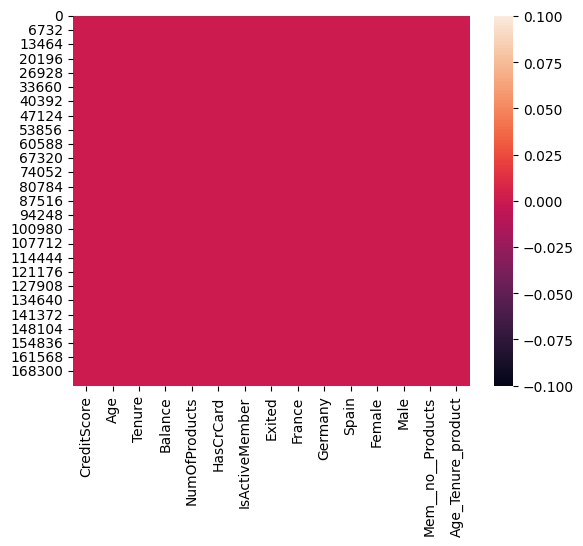

CPU times: user 4.66 s, sys: 293 ms, total: 4.96 s
Wall time: 7.6 s


In [ ]:
%%time
print(round(df.isnull().sum()/len(df), 2))
sns.heatmap(df.isnull())
plt.show();

In [ ]:
def unique_values_message(dataframe):
    def get_unique_values_count(column):
        if column.dtype == 'object':
            return len(column.unique())
        return 0

    unique_counts = dataframe.apply(get_unique_values_count)

    messages = []
    for column, count in unique_counts.items():
        if count > 0:
            messages.append(f"La columna <{column}> tiene {count} valores únicos.")
        else:
             return print("No hay features categóricos")

    return print('\n'.join(messages))

In [ ]:
unique_values_message(df)

No hay features categóricos


In [ ]:
def custom_describe(dataframe, excluded_columns=None):
    if excluded_columns is None:
        numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    else:
        numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns.difference(excluded_columns)

    percentiles = [1, 3, 5, 10, 25, 50, 75, 90, 92, 95, 99]
    describe_result = dataframe[numeric_columns].describe(percentiles=[p/100 for p in percentiles]).T

    return display(describe_result)

In [ ]:
custom_describe(df, ['None'])

,count,mean,std,min,1%,3%,5%,10%,25%,50%,75%,90%,92%,95%,99%,max
Age,175028.0,38.171337,8.969565,18.0,22.0,24.0,26.0,28.0,32.0,37.0,42.00,50.00,52.00,56.000,66.00,92.00
Age_Tenure_product,175028.0,191.346929,118.745788,0.0,0.0,0.0,31.0,41.0,93.0,180.0,272.00,350.00,364.00,396.000,504.00,880.00
Balance,175028.0,56676.772103,62982.418525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120727.97,140691.07,143835.47,152100.633,174060.46,250898.09
CreditScore,175028.0,656.113068,81.148273,350.0,464.0,498.0,521.0,551.0,597.0,659.0,710.00,755.00,763.00,790.000,850.00,850.00
Exited,175028.0,0.211149,0.408125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.000,1.00,1.00
Female,175028.0,0.436644,0.495971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.000,1.00,1.00
France,175028.0,0.566909,0.495504,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,1.00,1.000,1.00,1.00
Germany,175028.0,0.212046,0.408758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.000,1.00,1.00
HasCrCard,175028.0,0.751183,0.432329,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.00,1.000,1.00,1.00
IsActiveMember,175028.0,0.498754,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.000,1.00,1.00


# **Exploratory Data Analysis (E.D.A)**

In [ ]:
def plot_heatmap(df, target_column, exclude_column=None):
    if exclude_column:
        df = df.drop(columns=[exclude_column])

    yes = df[df[target_column] == 1].describe().T
    no = df[df[target_column] == 0].describe().T
    colors = ['#F93822', '#FDD20E']

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Subplot para los targets que sí
    sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=1, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
    ax[0].set_title('Target salió')

    # Subplot para los targets que no
    sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=1, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
    ax[1].set_title('Target no salió')

    plt.tight_layout()
    plt.show();

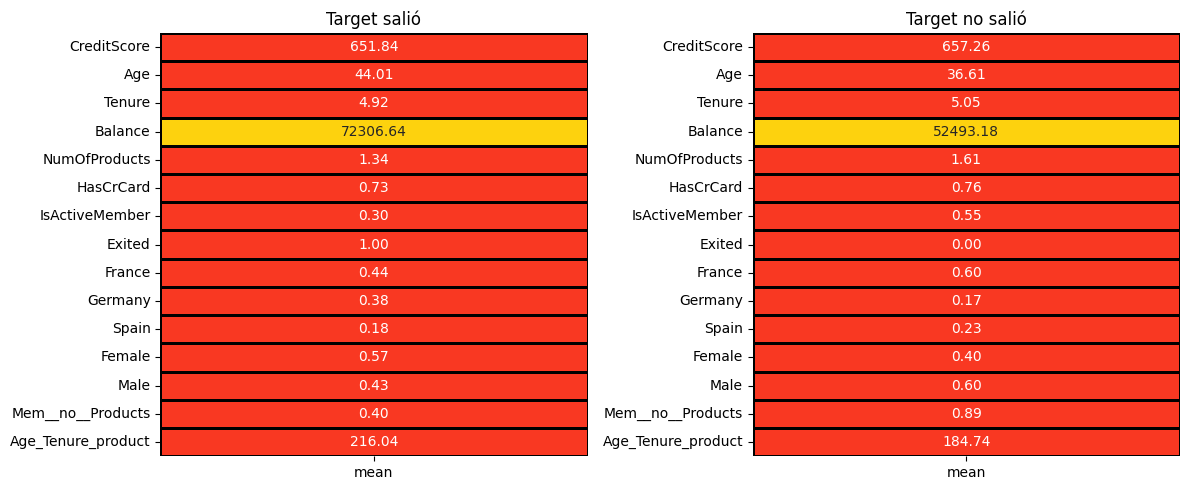

In [ ]:
plot_heatmap(df, 'Exited')

In [ ]:
def plot_target_distribution(df, target_column):
    plt.figure(figsize=(12, 4))

    # Gráfico de pastel (Pie chart)
    plt.subplot(1, 2, 1)
    segmentation_counts = df[target_column].value_counts()
    plt.pie(segmentation_counts, labels=segmentation_counts.index, autopct='%1.1f%%', colors=["skyblue", "lightgreen"])
    plt.title(f'{target_column} Distribution')

    # Gráfico de barras (Bar chart)
    plt.subplot(1, 2, 2)
    ax = sns.countplot(x=target_column, data=df, palette=["skyblue", "lightgreen"])
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center')
    plt.title(f'{target_column} Count')

    plt.tight_layout()
    plt.show();

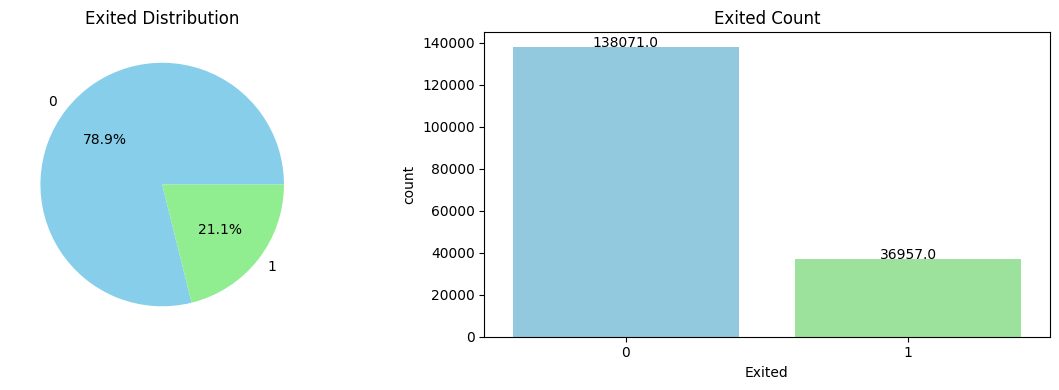

In [ ]:
plot_target_distribution(df, 'Exited')

In [ ]:
# realizar un análisis completo de los datos
reporte_clase = sv.analyze([df, "df"],target_feat='Exited')

                                             |          | [  0%]   00:00 -> (? left)


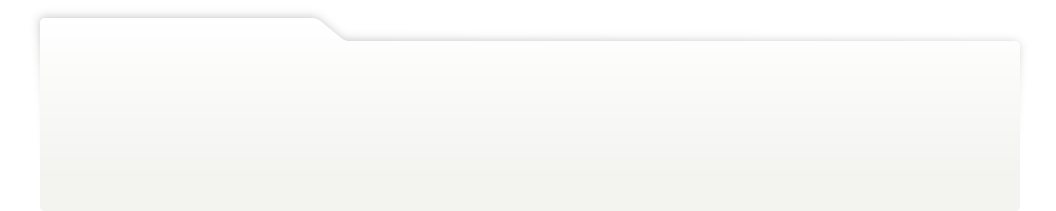
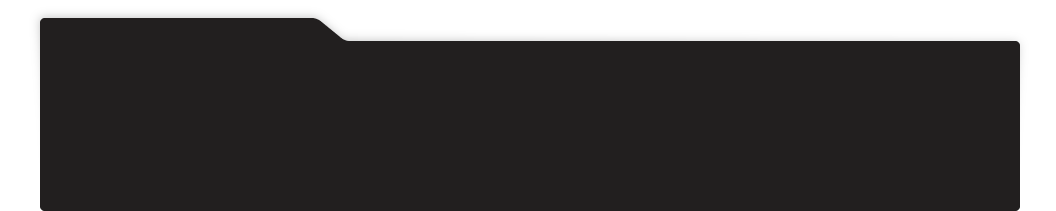
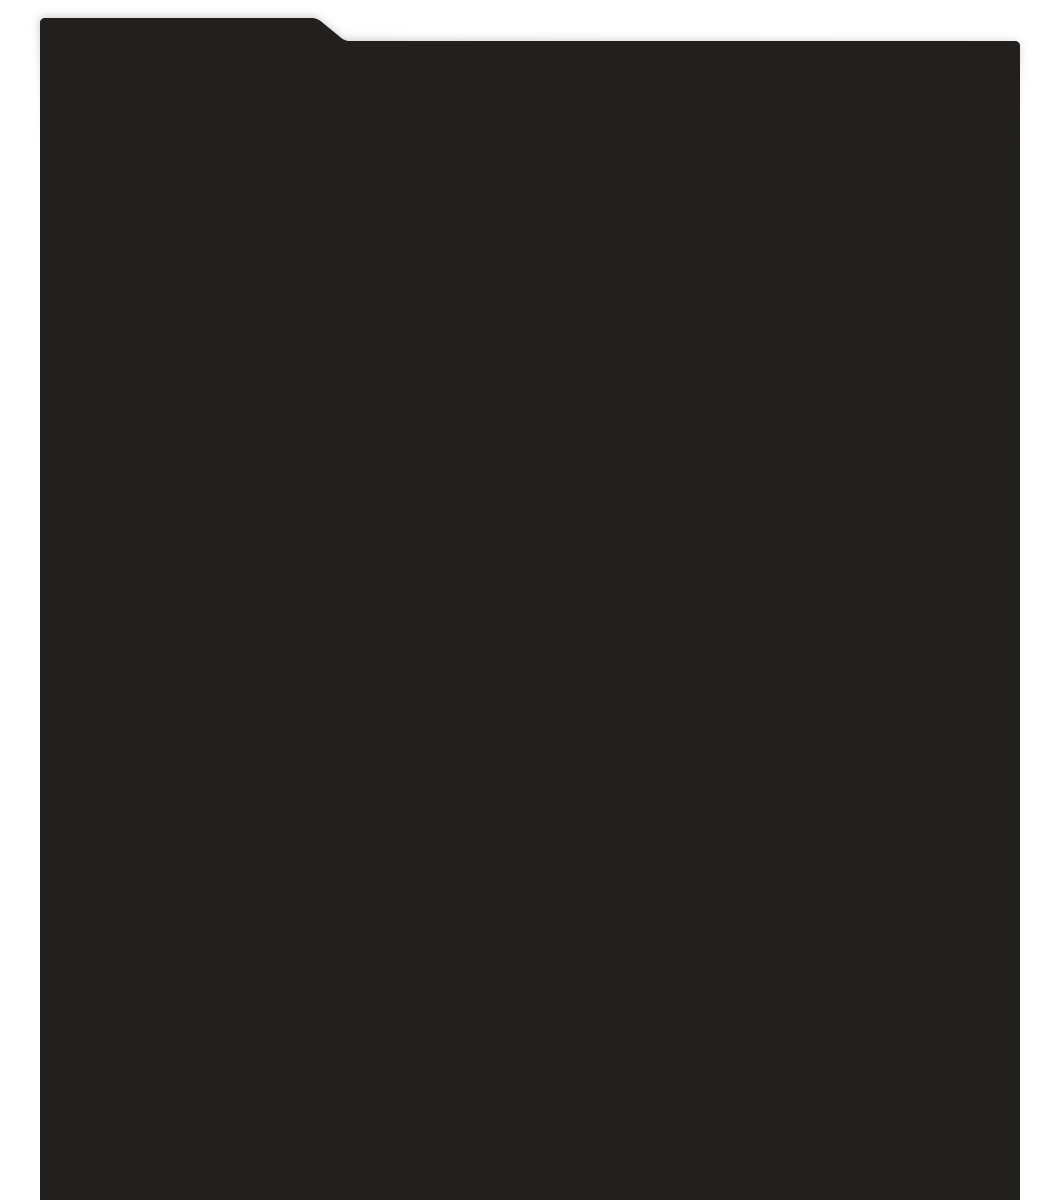
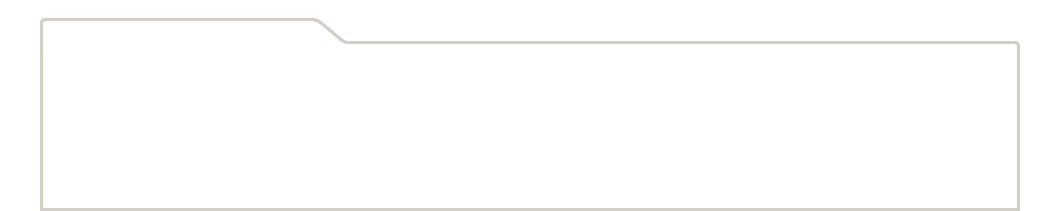
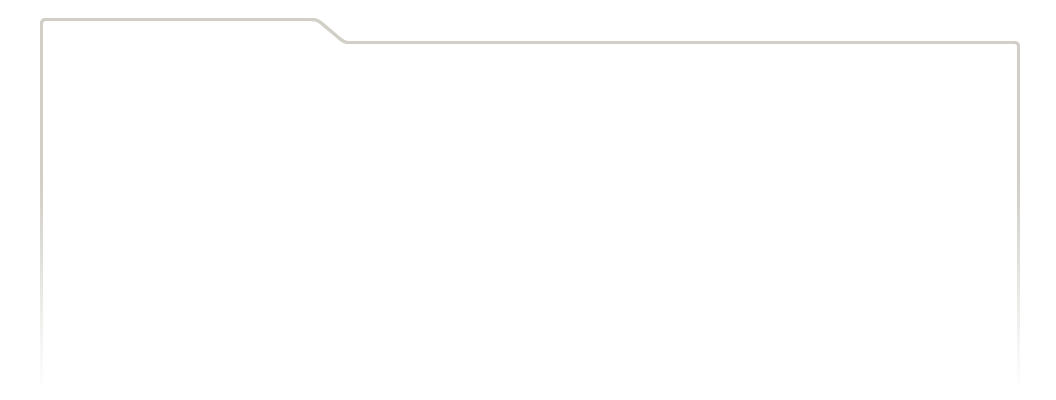
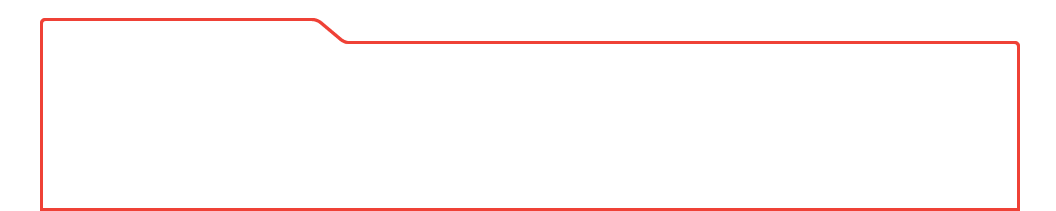
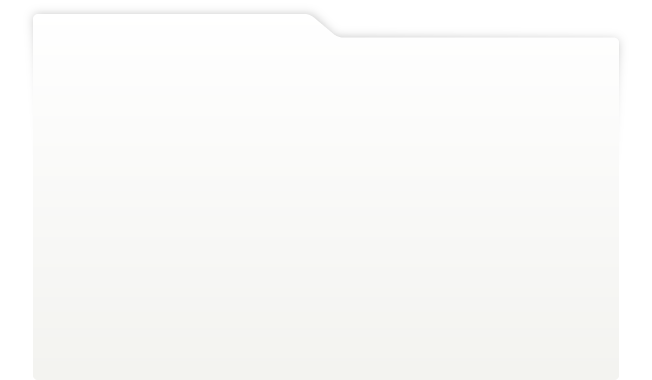
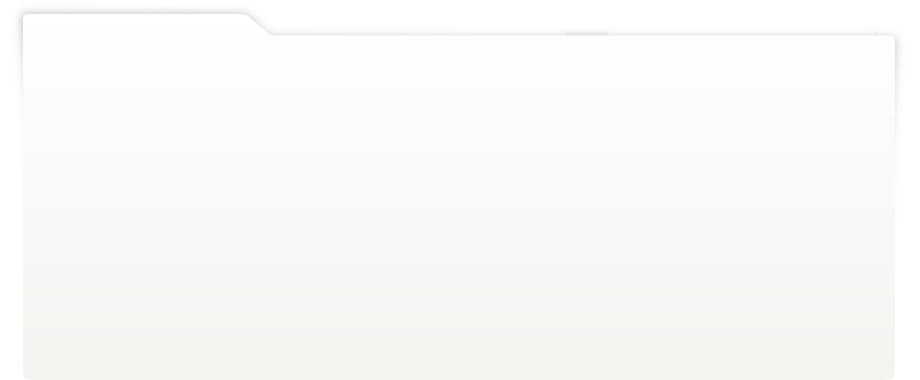
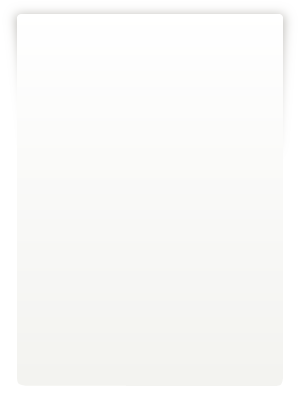
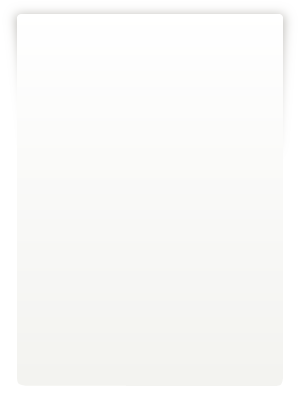
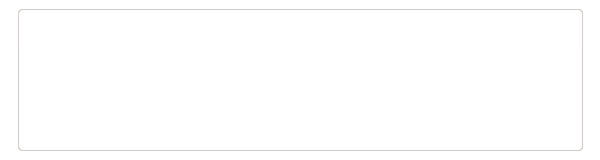
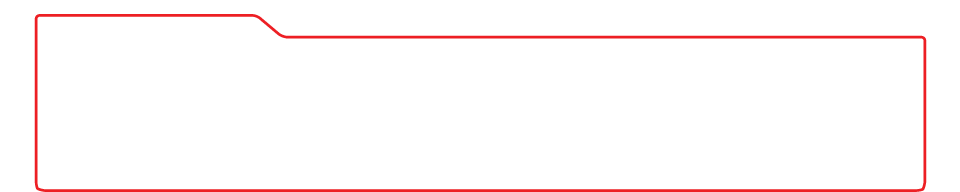
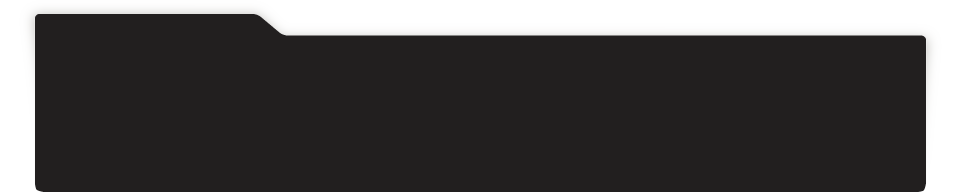
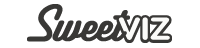
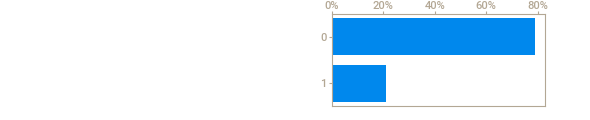
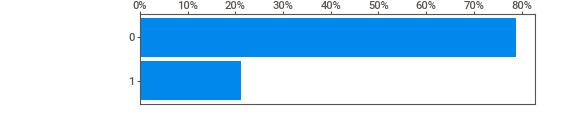
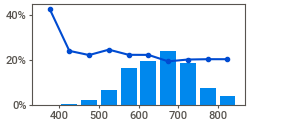
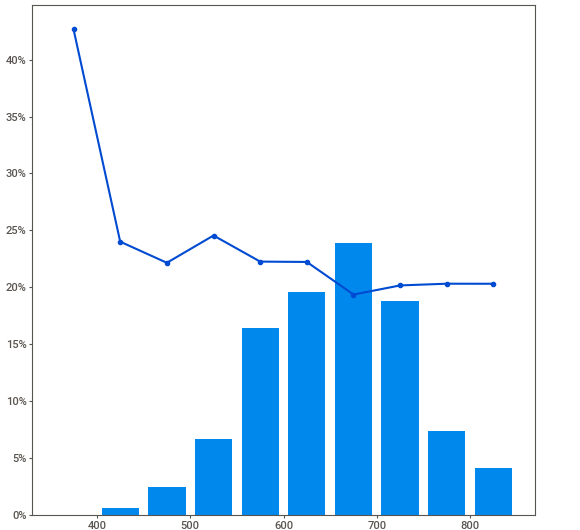
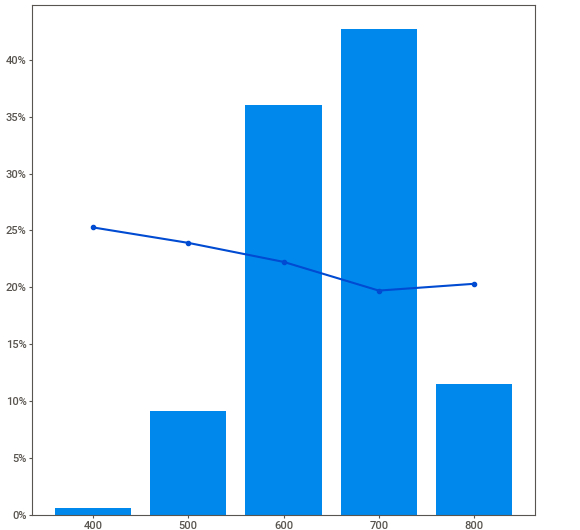
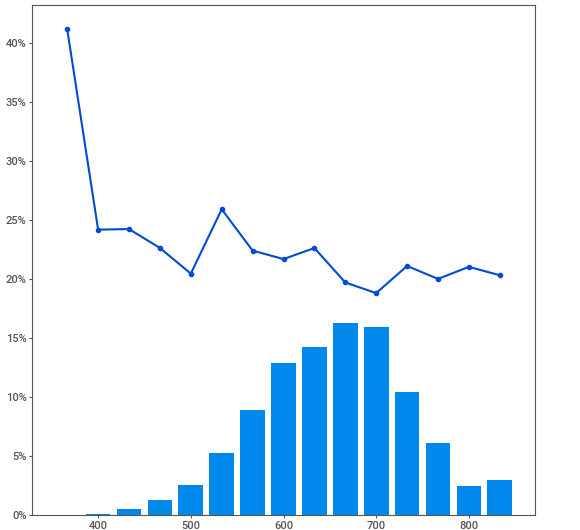
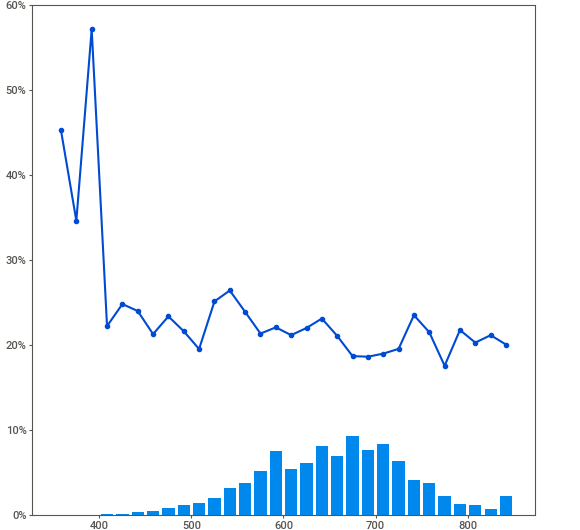
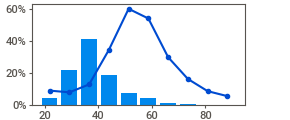
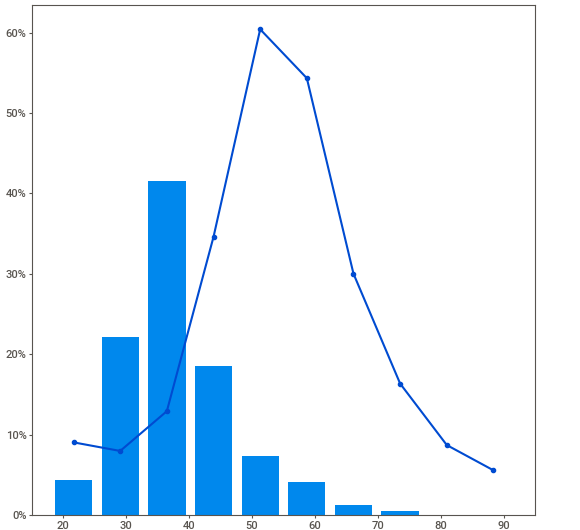
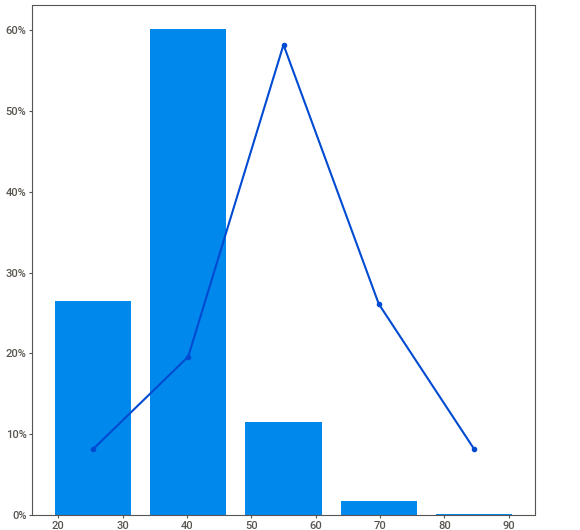
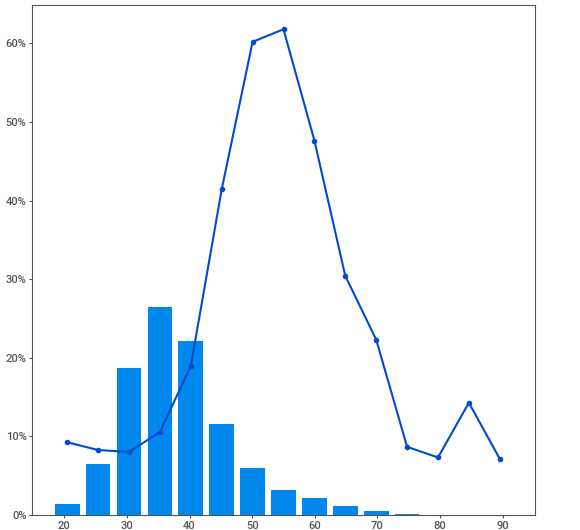
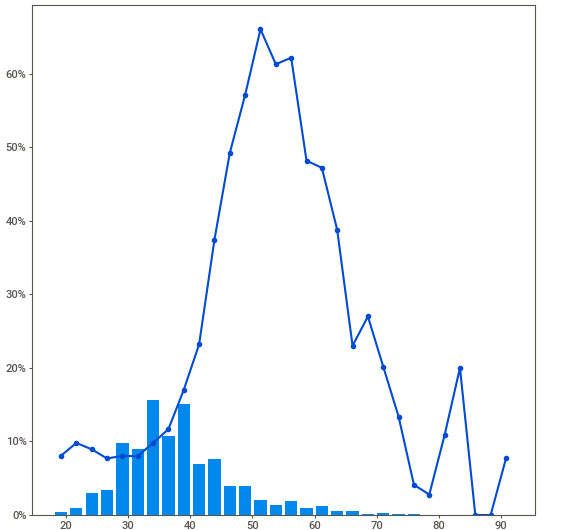
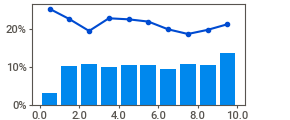
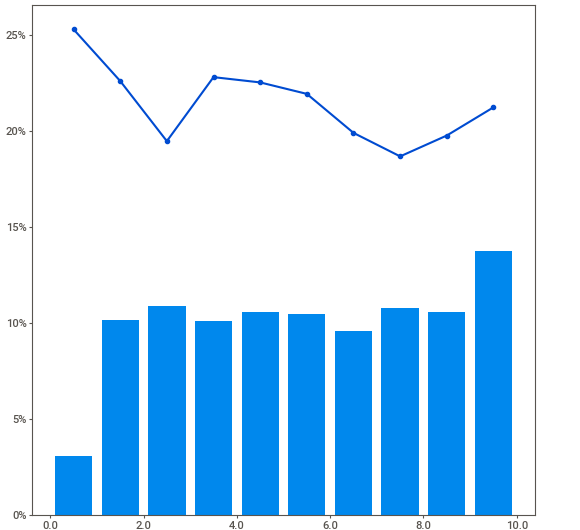
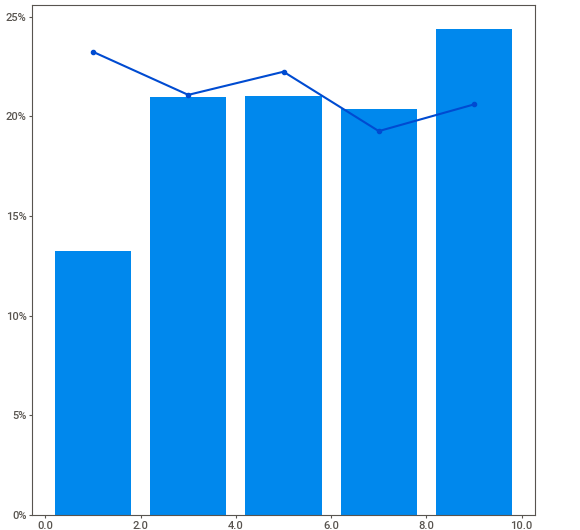
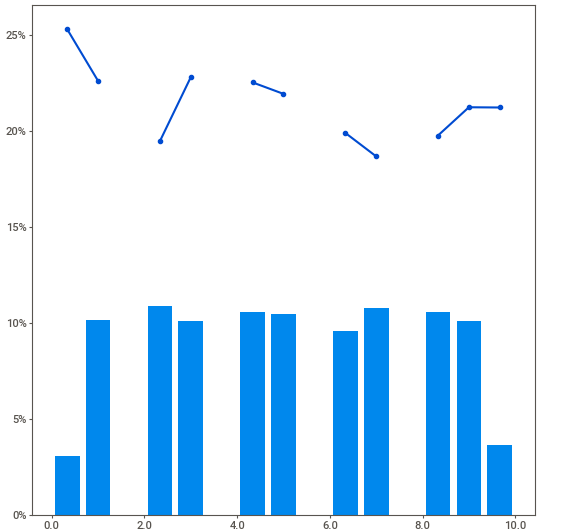
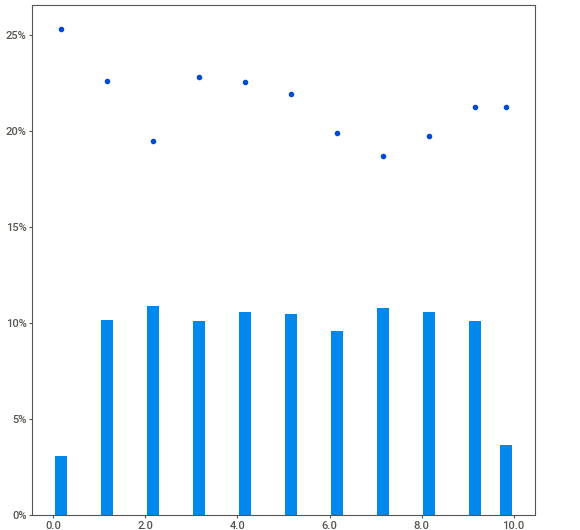
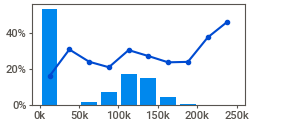
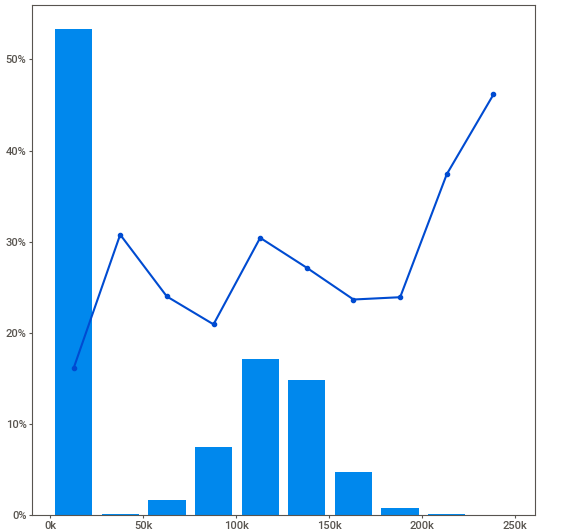
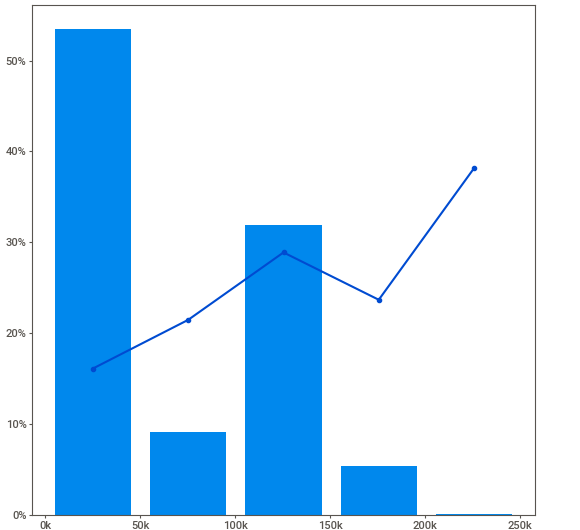
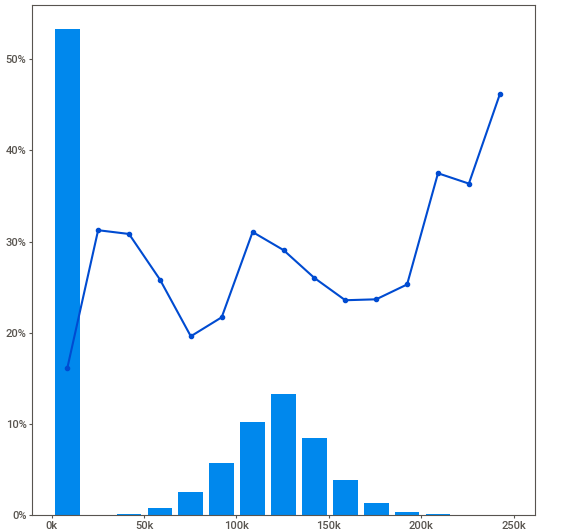
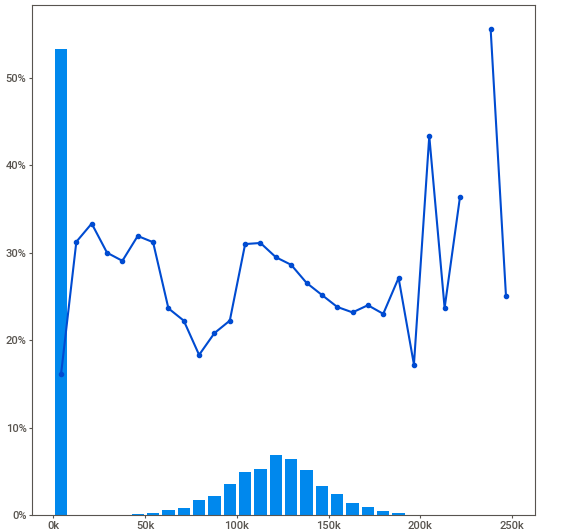
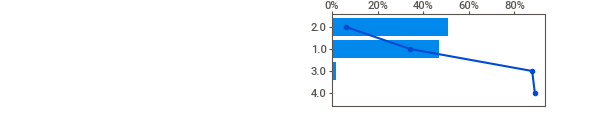
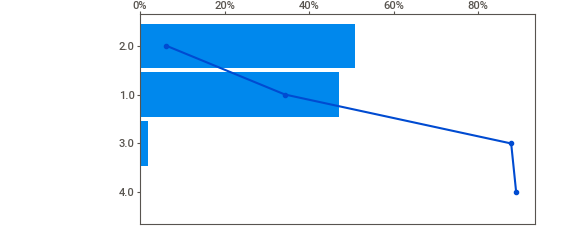
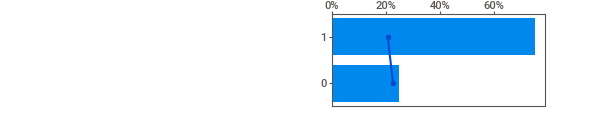
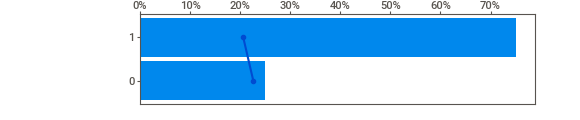
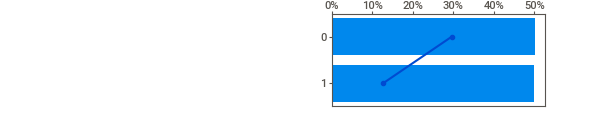
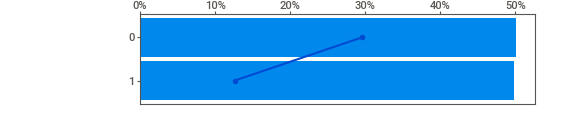
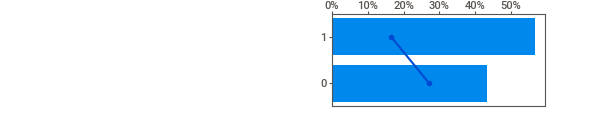
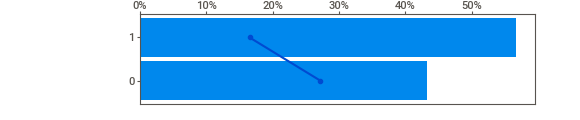
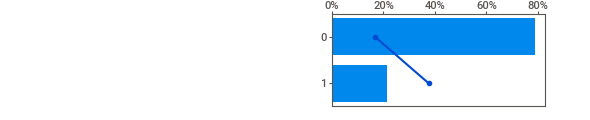
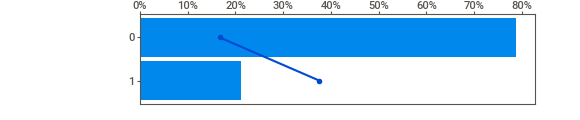
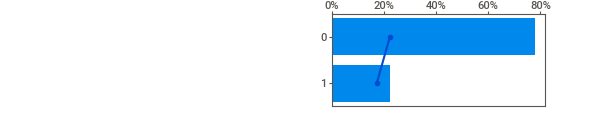
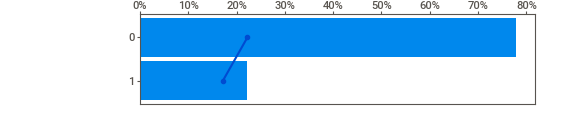
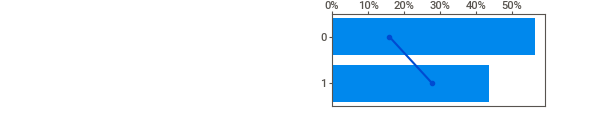
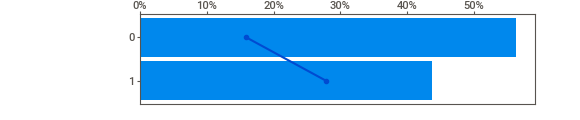
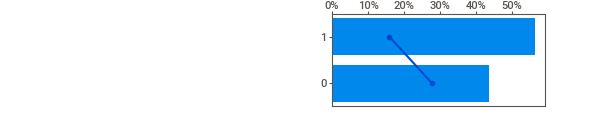
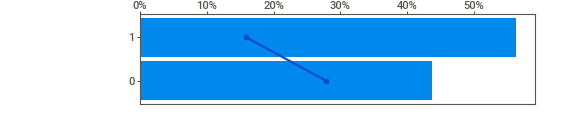
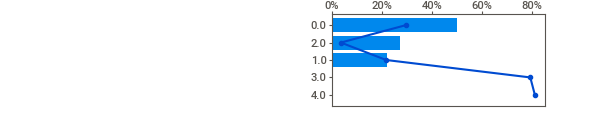
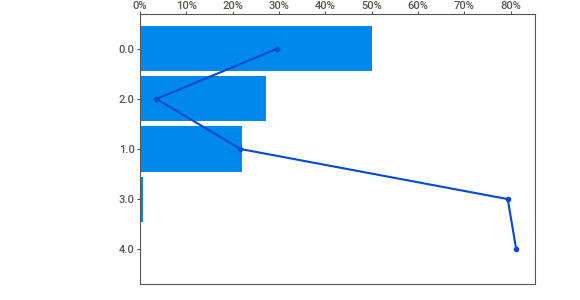
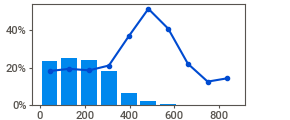
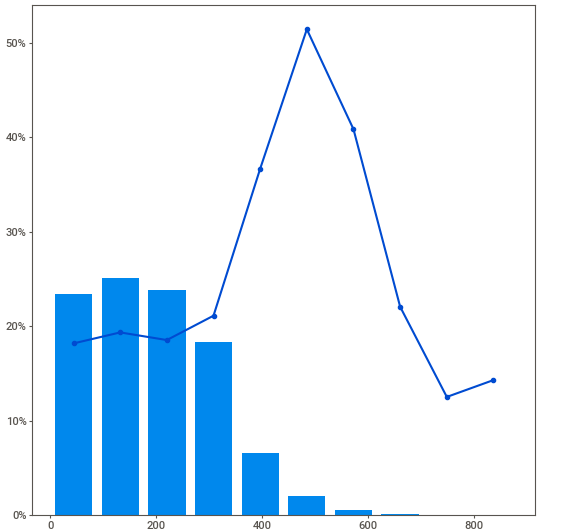
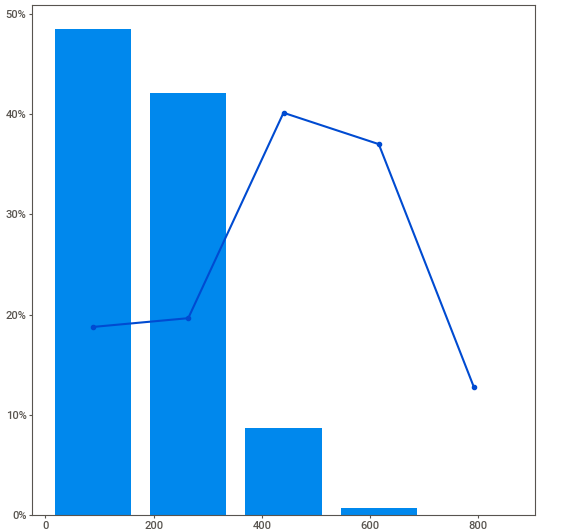
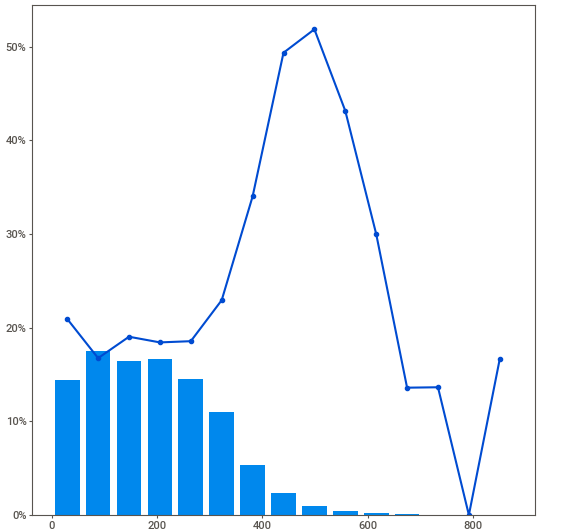
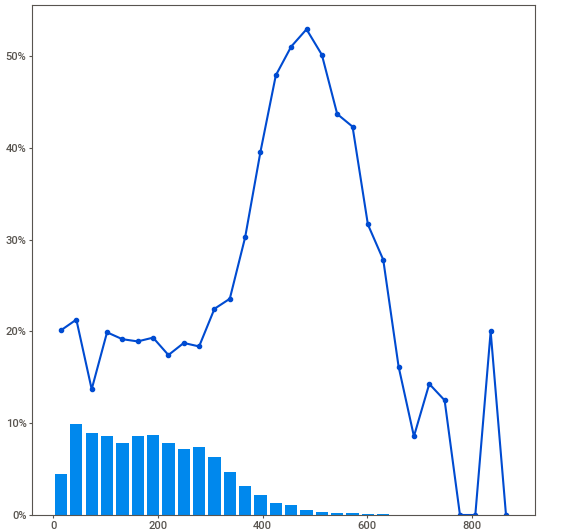
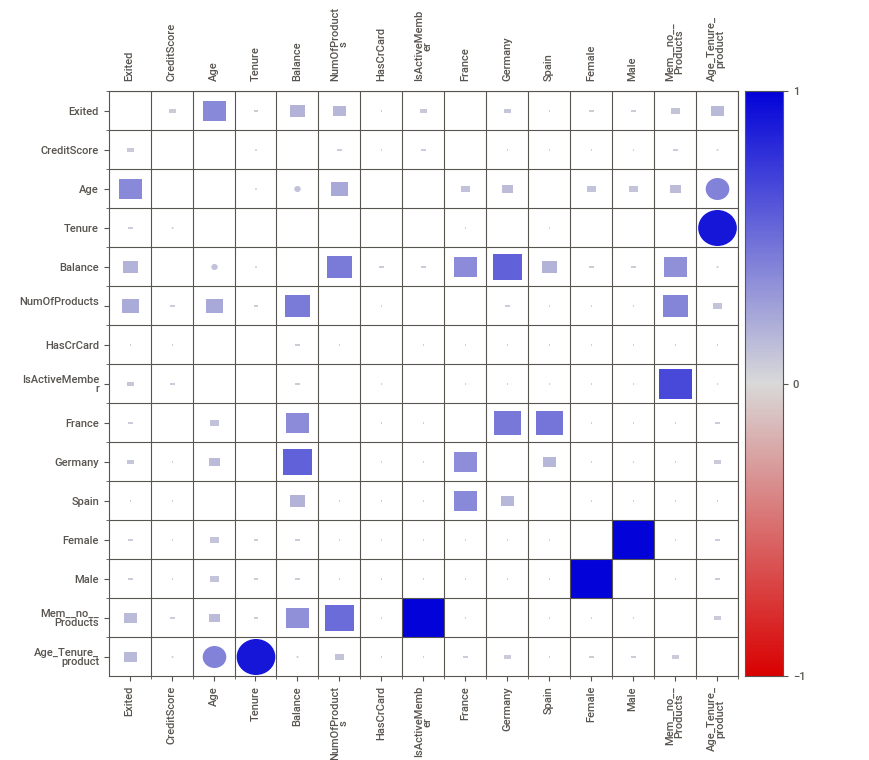
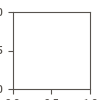

Error: Unable to generate the analysis report.


In [ ]:
#Espacio
html_reporte = reporte_clase.show_notebook()
# Check if the report object is valid before attempting to modify it
if html_reporte:
    # Modify the attributes of the report object
    if hasattr(html_reporte, 'data'):
        html_reporte.data = html_reporte.data.replace('width:100%', 'width:800px')
        html_reporte.data = html_reporte.data.replace('height:100%', 'height:600px')
    html_reporte
else:
    print("Error: Unable to generate the analysis report.")

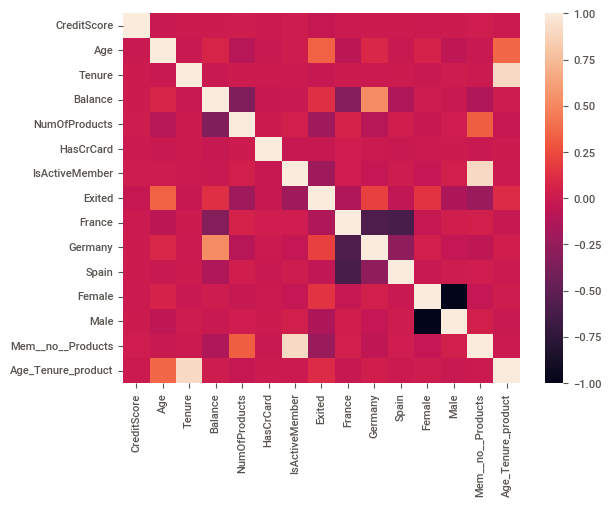

In [ ]:
# Verificar correlaciones entre las variables
sns.heatmap(df.corr())
plt.show();

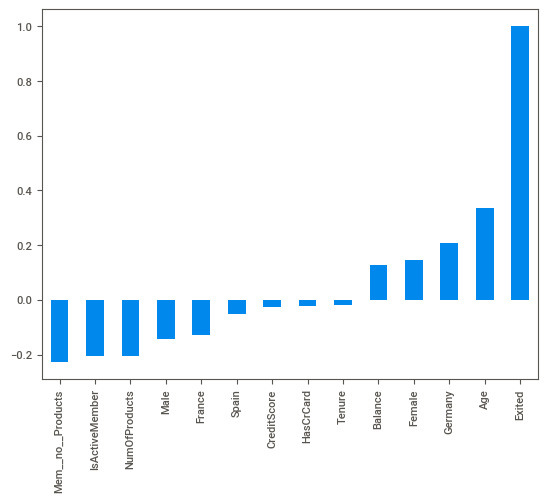

In [ ]:
# Grafica de correlaciones con la variable de salida
df.corr()["Exited"][:-1].sort_values().plot(kind="bar");
plt.show();

# 3. Data Preparation <a name="data-preparation"></a>

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'France', 'Germany', 'Spain', 'Female',
       'Male', 'Mem__no__Products', 'Age_Tenure_product'],
      dtype='object')

In [ ]:
def handle_outliers(dataframe, target_column, min_percentile, max_percentile):
    new_dataframe = dataframe.copy()

    numeric_columns = new_dataframe.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns.difference([target_column])

    for column in numeric_columns:
        unique_values = new_dataframe[column].nunique()
        if unique_values >= 15:
            min_threshold = round(new_dataframe[column].quantile(min_percentile), 0)
            max_threshold = round(new_dataframe[column].quantile(max_percentile), 0)
            print(f'column: {column} min: {min_threshold} max: {max_threshold}')
            new_dataframe[column] = np.where(new_dataframe[column] <= min_threshold, min_threshold, new_dataframe[column])
            new_dataframe[column] = np.where(new_dataframe[column] >= max_threshold, max_threshold, new_dataframe[column])

    return new_dataframe

In [ ]:
df = handle_outliers(dataframe=df,
                    target_column='Exited',
                    min_percentile=0.005,
                    max_percentile=0.99998)

column: Age min: 21.0 max: 92.0
column: Age_Tenure_product min: 0.0 max: 839.0
column: Balance min: 0.0 max: 244636.0
column: CreditScore min: 444.0 max: 850.0


## Feature Engineering

In [ ]:
def encode_features_with_label_encoder(dataframe):
    encoded_dataframe = dataframe.copy()

    label_encoder = LabelEncoder()

    encoded_dataframe = encoded_dataframe.apply(lambda x: pd.Series(label_encoder.fit_transform(x), name=x.name) if x.dtype == 'object' else x)

    return encoded_dataframe

In [ ]:
df = encode_features_with_label_encoder(df)

## Format data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  float64
 1   Age                 175028 non-null  float64
 2   Tenure              175028 non-null  float64
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  float64
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   Exited              175028 non-null  int64  
 8   France              175028 non-null  int64  
 9   Germany             175028 non-null  int64  
 10  Spain               175028 non-null  int64  
 11  Female              175028 non-null  int64  
 12  Male                175028 non-null  int64  
 13  Mem__no__Products   175028 non-null  float64
 14  Age_Tenure_product  175028 non-null  float64
dtypes: float64(7), int64(8)
memory usa

In [ ]:
custom_describe(df)

,count,mean,std,min,1%,3%,5%,10%,25%,50%,75%,90%,92%,95%,99%,max
CreditScore,175028.0,656.208452,80.873361,444.0,464.0,498.0,521.0,551.0,597.0,659.0,710.00,755.00,763.00,790.000,850.00,850.0
Age,175028.0,38.178639,8.954743,21.0,22.0,24.0,26.0,28.0,32.0,37.0,42.00,50.00,52.00,56.000,66.00,92.0
Tenure,175028.0,5.019968,2.811155,0.0,0.0,0.0,1.0,1.0,3.0,5.0,7.00,9.00,9.00,9.000,10.00,10.0
Balance,175028.0,56676.628993,62981.984319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120727.97,140691.07,143835.47,152100.633,174060.46,244636.0
NumOfProducts,175028.0,1.553072,0.549212,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.00,2.00,2.00,2.000,3.00,4.0
HasCrCard,175028.0,0.751183,0.432329,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.00,1.000,1.00,1.0
IsActiveMember,175028.0,0.498754,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.000,1.00,1.0
Exited,175028.0,0.211149,0.408125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.000,1.00,1.0
France,175028.0,0.566909,0.495504,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,1.00,1.000,1.00,1.0
Germany,175028.0,0.212046,0.408758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.000,1.00,1.0


# 4. Modeling <a name="modeling"></a>

In [ ]:
# Separate features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
print("Data entrenamiento - entrada: \n", X_train.shape,
      "\n Data entrenamiento - salida: \n", y_train.shape,
      "\n Data prueba entrada: \n", X_test.shape,
      "\n Data prueba salida: \n", y_test.shape)

Data entrenamiento - entrada: 
 (122519, 14) 
 Data entrenamiento - salida: 
 (122519,) 
 Data prueba entrada: 
 (52509, 14) 
 Data prueba salida: 
 (52509,)


In [ ]:
y_train.value_counts()

0    96649
1    25870
Name: Exited, dtype: int64

In [ ]:
y_test.value_counts()

0    41422
1    11087
Name: Exited, dtype: int64

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
# Aplicamos a los datos
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Select learning algorithms

#### Primer modelo

In [ ]:
# Iniciamos la arquitectura
modelo_base = Sequential()
# Agregamos una capa de entrada de la misma cantidad de valores de entrada.
modelo_base.add(Dense(units = 64,  activation = "relu", input_dim = X_train.shape[1]))
# Agregamos la primera capa oculta
modelo_base.add(Dense(units = 32 ,  activation = "relu"))
# Agregamos la segunda capa oculta
modelo_base.add(Dense(units = 16 ,  activation = "relu"))
# Agregamos la tercera capa oculta
modelo_base.add(Dense(units = 8 ,  activation = "relu"))
# Agregamos la cuarta capa oculta
modelo_base.add(Dense(units = 4 ,  activation = "relu"))
# Agregamos la quinta capa oculta
modelo_base.add(Dense(units = 2 ,  activation = "relu"))
# Agregamos la capa se salida
modelo_base.add(Dense(units = 1 ,  activation = "sigmoid"))

In [ ]:
modelo_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [ ]:
# Compilamos el modelo
modelo_base.compile(optimizer = "Adam",
               loss = "binary_crossentropy",
               metrics = ["accuracy"])

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo_base.fit(X_train,
           y_train,
           batch_size = 64,
           epochs = 50,
           validation_data = (X_test, y_test),
           verbose = 1)

Epoch 1/50
1915/1915 [==============================] - 9s 4ms/step - loss: 0.3582 - accuracy: 0.8459 - val_loss: 0.3347 - val_accuracy: 0.8628
Epoch 2/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8611 - val_loss: 0.3302 - val_accuracy: 0.8635
Epoch 3/50
1915/1915 [==============================] - 7s 3ms/step - loss: 0.3283 - accuracy: 0.8633 - val_loss: 0.3286 - val_accuracy: 0.8633
Epoch 4/50
1915/1915 [==============================] - 5s 3ms/step - loss: 0.3270 - accuracy: 0.8633 - val_loss: 0.3276 - val_accuracy: 0.8633
Epoch 5/50
1915/1915 [==============================] - 7s 4ms/step - loss: 0.3258 - accuracy: 0.8637 - val_loss: 0.3265 - val_accuracy: 0.8643
Epoch 6/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.3248 - accuracy: 0.8637 - val_loss: 0.3268 - val_accuracy: 0.8642
Epoch 7/50
1915/1915 [==============================] - 5s 3ms/step - loss: 0.3246 - accuracy: 0.8641 - val_loss: 0.3269 - val_accuracy:

In [ ]:
# Transformamos a data frame - loss
modelo_base_loss = pd.DataFrame(modelo_base.history.history)

In [ ]:
modelo_base_loss

,loss,accuracy,val_loss,val_accuracy
0,0.358178,0.845901,0.334711,0.862804
1,0.332298,0.861099,0.330232,0.863452
2,0.328280,0.863335,0.328643,0.863281
3,0.326968,0.863254,0.327558,0.863300
4,0.325838,0.863735,0.326513,0.864328
5,0.324827,0.863662,0.326762,0.864214
6,0.324608,0.864127,0.326902,0.863300
7,0.323981,0.863850,0.330348,0.862900
8,0.323803,0.863956,0.325364,0.864195
9,0.323357,0.864437,0.327698,0.863928


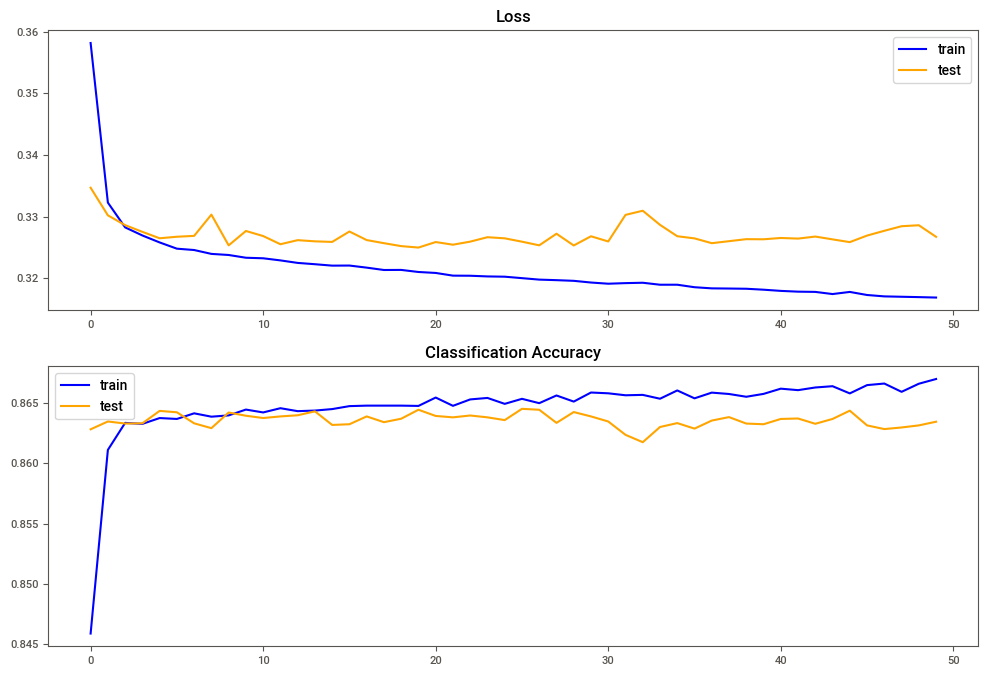

In [ ]:
# Graficar todo
plt.figure(figsize=(12, 8))
# Subplot para la pérdida
plt.subplot(211)
plt.title('Loss')  # Leyenda para el subplot de pérdida
plt.plot(modelo_base_loss['loss'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_base_loss['val_loss'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
# Subplot para la precisión de la clasificación
plt.subplot(212)
plt.title('Classification Accuracy')  # Leyenda para el subplot de precisión de clasificación
plt.plot(modelo_base_loss['accuracy'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_base_loss['val_accuracy'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
plt.show();

In [ ]:
%%time
# Establecemos el punto de corte para todos los modelos
threshold = 0.35

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
%%time
# Predecimos en la train y test
predichos_train  = modelo_base.predict(X_train)
predichos_train = (predichos_train>threshold)
predichos_test  = modelo_base.predict(X_test)
predichos_test = (predichos_test>threshold)

1641/1641 [==============================] - 2s 1ms/step
CPU times: user 12.1 s, sys: 573 ms, total: 12.7 s
Wall time: 15.6 s


In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("==============================================\n",
      "           METRICAS DE EVALUCACIÓN",
      "\n==============================================")
print("Matriz de confusión: Train:\n", matrizconf_train)
print("\n")
print("Matriz de confusión: tes:\n ", matrizconf_test)
print("\n")
print("Accuracy Train:", round(accuracy_train, 3))
print("Accuracy test:", round(accuracy_test, 3))
print("precision Train:", round(precision_train, 3))
print("precision test:", round(precision_test, 3))
print("recall  train:", round(recall_train, 3))
print("recall test:", round(recall_test, 3))

            METRICAS DE EVALUCACIÓN 
Matriz de confusión: Train:
 [[87158  9491]
 [ 8152 17718]]


Matriz de confusión: tes:
  [[37252  4170]
 [ 3645  7442]]


Accuracy Train: 0.856
Accuracy test: 0.851
precision Train: 0.651
precision test: 0.641
recall  train: 0.685
recall test: 0.671


#### Segundo modelo

In [ ]:
# Iniciamos la arquitectura
modelo_2 = Sequential()
# Agregamos una capa de entrada de la misma cantidad de valores de entrada.
modelo_2.add(Dense(units = 64,  activation = "relu", input_dim = X_train.shape[1]))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la primera capa oculta
modelo_2.add(Dense(units = 32,  activation = "relu", input_dim = X_train.shape[1]))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la segunda capa oculta
modelo_2.add(Dense(units = 16 ,  activation = "relu"))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la tercera capa oculta
modelo_2.add(Dense(units = 8 ,  activation = "relu"))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la cuarta capa oculta
modelo_2.add(Dense(units = 4 ,  activation = "relu"))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la quinta capa oculta
modelo_2.add(Dense(units = 2 ,  activation = "relu"))
modelo_2.add(Dropout(0.25)) # desactivar el 25% de las neuronas en cada epochs
# Agregamos la capa se salida
modelo_2.add(Dense(units = 1 ,  activation = "sigmoid"))

In [ ]:
modelo_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                

In [ ]:
# Compilamos el modelo
modelo_2.compile(optimizer = "Adam",
               loss = "binary_crossentropy",
               metrics = ["accuracy"])

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo_2.fit(X_train,
           y_train,
           batch_size = 64,
           epochs = 20,
           validation_data = (X_test, y_test),
           verbose = 1)

Epoch 1/20
1915/1915 [==============================] - 9s 4ms/step - loss: 0.4845 - accuracy: 0.8053 - val_loss: 0.3775 - val_accuracy: 0.8280
Epoch 2/20
1915/1915 [==============================] - 6s 3ms/step - loss: 0.4229 - accuracy: 0.8200 - val_loss: 0.3640 - val_accuracy: 0.8389
Epoch 3/20
1915/1915 [==============================] - 8s 4ms/step - loss: 0.4185 - accuracy: 0.8231 - val_loss: 0.3635 - val_accuracy: 0.8352
Epoch 4/20
1915/1915 [==============================] - 6s 3ms/step - loss: 0.4141 - accuracy: 0.8253 - val_loss: 0.3574 - val_accuracy: 0.8464
Epoch 5/20
1915/1915 [==============================] - 8s 4ms/step - loss: 0.4077 - accuracy: 0.8295 - val_loss: 0.3530 - val_accuracy: 0.8463
Epoch 6/20
1915/1915 [==============================] - 6s 3ms/step - loss: 0.4071 - accuracy: 0.8296 - val_loss: 0.3532 - val_accuracy: 0.8479
Epoch 7/20
1915/1915 [==============================] - 8s 4ms/step - loss: 0.4052 - accuracy: 0.8318 - val_loss: 0.3509 - val_accuracy:

In [ ]:
# Transformamos a data frame - loss
modelo_2_loss = pd.DataFrame(modelo_2.history.history)

In [ ]:
modelo_2_loss

,loss,accuracy,val_loss,val_accuracy
0,0.484485,0.805255,0.377465,0.828010
1,0.422896,0.819979,0.364046,0.838923
2,0.418536,0.823138,0.363482,0.835209
3,0.414101,0.825317,0.357448,0.846445
4,0.407741,0.829488,0.352990,0.846312
5,0.407067,0.829594,0.353171,0.847950
6,0.405223,0.831806,0.350938,0.850273
7,0.404072,0.832532,0.347857,0.853378
8,0.401888,0.832948,0.351346,0.850921
9,0.403817,0.831357,0.347784,0.853568


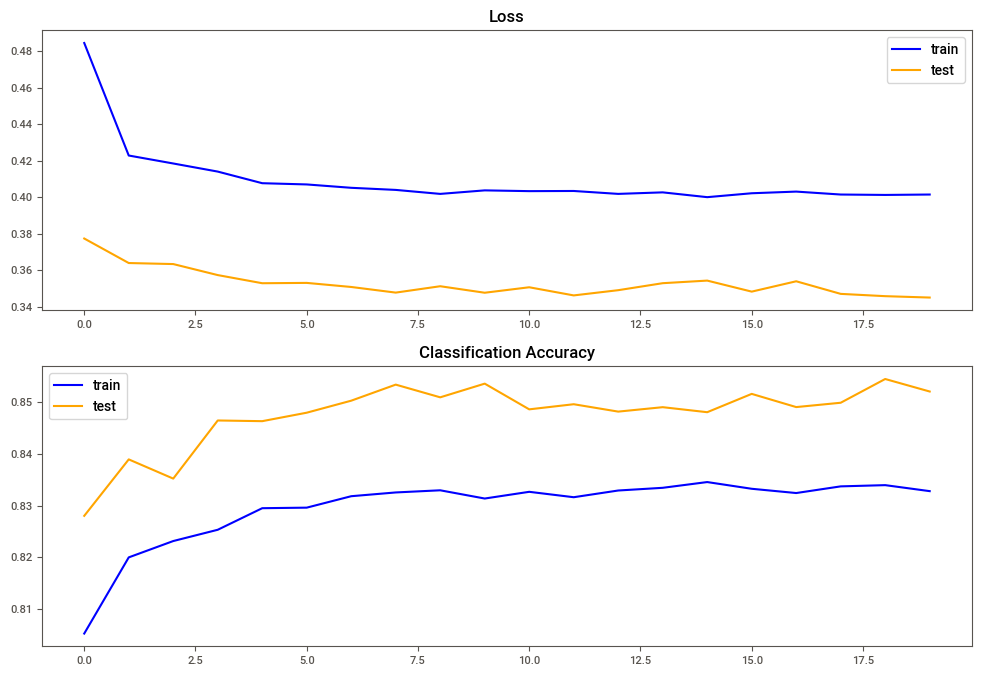

In [ ]:
# Graficar todo
plt.figure(figsize=(12, 8))
# Subplot para la pérdida
plt.subplot(211)
plt.title('Loss')  # Leyenda para el subplot de pérdida
plt.plot(modelo_2_loss['loss'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_2_loss['val_loss'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
# Subplot para la precisión de la clasificación
plt.subplot(212)
plt.title('Classification Accuracy')  # Leyenda para el subplot de precisión de clasificación
plt.plot(modelo_2_loss['accuracy'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_2_loss['val_accuracy'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
plt.show();

In [ ]:
# Predecimos en la train y test
predichos_train_2  = modelo_2.predict(X_train)
predichos_train_2 = (predichos_train>threshold)
predichos_test_2  = modelo_2.predict(X_test)
predichos_test_2 = (predichos_test>threshold)

1641/1641 [==============================] - 3s 2ms/step


In [ ]:
# Metricas
matrizconf_train_2 = metrics.confusion_matrix(y_train, predichos_train_2)
matrizconf_test_2 = metrics.confusion_matrix(y_test, predichos_test_2)
accuracy_train_2 = metrics.accuracy_score(y_train, predichos_train_2)
accuracy_test_2 = metrics.accuracy_score(y_test, predichos_test_2)
precision_train_2 = metrics.precision_score(y_train, predichos_train_2)
precision_test_2 = metrics.precision_score(y_test, predichos_test_2)
recall_train_2 = metrics.recall_score(y_train, predichos_train_2)
recall_test_2 = metrics.recall_score(y_test, predichos_test_2)
print("==============================================\n",
      "           METRICAS DE EVALUCACIÓN",
      "\n==============================================")
print("Matriz de confusión: Train:\n", matrizconf_train_2)
print("\n")
print("Matriz de confusión: tes:\n ", matrizconf_test_2)
print("\n")
print("Accuracy Train:", round(accuracy_train_2, 3))
print("Accuracy test:", round(accuracy_test_2, 3))
print("precision Train:", round(precision_train_2, 3))
print("precision test:", round(precision_test_2, 3))
print("recall  train:", round(recall_train_2, 3))
print("recall test:", round(recall_test_2, 3))

            METRICAS DE EVALUCACIÓN 
Matriz de confusión: Train:
 [[87158  9491]
 [ 8152 17718]]


Matriz de confusión: tes:
  [[37252  4170]
 [ 3645  7442]]


Accuracy Train: 0.856
Accuracy test: 0.851
precision Train: 0.651
precision test: 0.641
recall  train: 0.685
recall test: 0.671



#### Tercer modelo

In [ ]:
# Establecer una semilla - reproducibilidad
tf.random.set_seed(42)

In [ ]:
def modelo_inicializadores(initializer):
  # Iniciamos la arquitectura
  modelo_3 = Sequential([
  # Agregamos una capa de entrada de la misma cantidad de valores de entrada.
  Dense(units = 64, kernel_initializer = initializer, activation = "relu", input_dim = X_train.shape[1]),
  # Agregamos la primera capa oculta,
  Dense(units = 32, kernel_initializer = initializer,   activation = "relu"),
  # Agregamos la segunda capa oculta
  Dense(units = 16, kernel_initializer = initializer,   activation = "relu"),
  # Agregamos la tercera capa oculta
  Dense(units = 8 , kernel_initializer = initializer,  activation = "relu"),
  # Agregamos la cuarta capa oculta
  Dense(units = 4, kernel_initializer = initializer,   activation = "relu"),
  # Agregamos la quinta capa oculta
  Dense(units = 2, kernel_initializer = initializer,   activation = "relu"),
  # Agregamos la capa se salida
  Dense(units = 1, kernel_initializer = initializer,   activation = "sigmoid")
  ])
  modelo_3.compile(optimizer = "adam",
                  loss = "binary_crossentropy",
                  metrics = ['accuracy'])
  return modelo_3

In [ ]:
#Definir inicializadores
initializers_dict = {
    'RandomNormal': initializers.RandomNormal(mean=0.0, stddev=0.05),
    'RandomUniform': initializers.RandomUniform(minval=-0.05, maxval=0.05),
    'TruncatedNormal': initializers.TruncatedNormal(mean=0.0, stddev=0.05),
    'lecun_uniform': initializers.lecun_uniform(),
    'glorot_normal': initializers.glorot_normal(),
    'glorot_uniform': initializers.glorot_uniform(),
    'he_normal': initializers.he_normal(),
    'he_uniform': initializers.he_uniform()
}

In [ ]:
# Guardar resultados
results = {}

In [ ]:
# Entrenar modelo y guardar resultados
for nombre, initializers_dict in initializers_dict.items():
  modelo_3 = modelo_inicializadores(initializers_dict)
  history = modelo_3.fit(X_train,
                        y_train,
                        epochs = 50,
                        batch_size = 64,
                        validation_data = (X_test, y_test),
                        verbose = 1)
  results[nombre] = history
  print(f"\nEntrennamiento con el inicilizador {nombre} completado\n")

Epoch 1/50
1915/1915 [==============================] - 7s 3ms/step - loss: 0.5637 - accuracy: 0.7886 - val_loss: 0.5178 - val_accuracy: 0.7889
Epoch 2/50
1915/1915 [==============================] - 7s 4ms/step - loss: 0.5159 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 3/50
1915/1915 [==============================] - 15s 8ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 4/50
1915/1915 [==============================] - 13s 7ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 5/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 6/50
1915/1915 [==============================] - 7s 4ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 7/50
1915/1915 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accurac

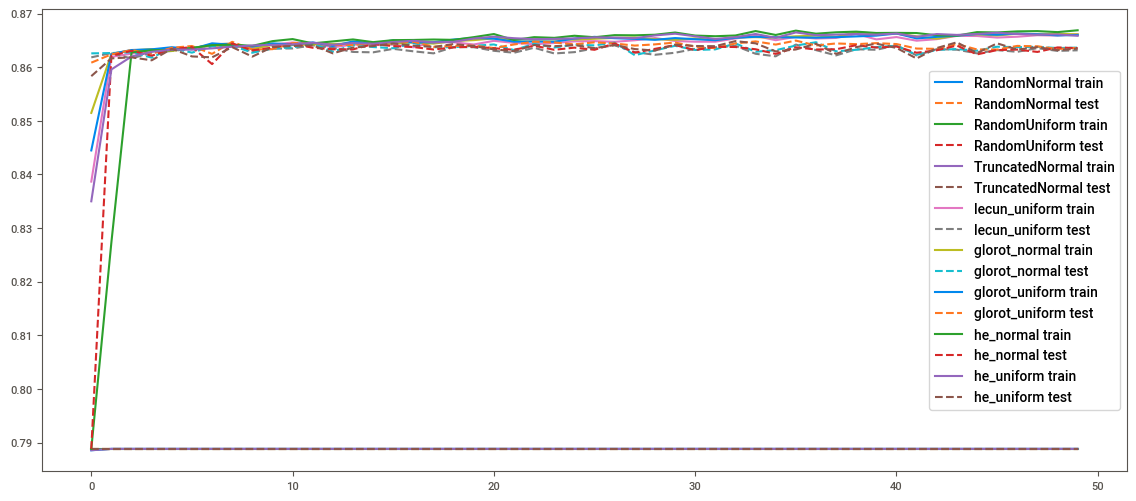

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(14,6))
for nombre, history in results.items():
  plt.plot(history.history['accuracy'], label=f'{nombre} train')
  plt.plot(history.history['val_accuracy'], label=f'{nombre} test', linestyle="--")
plt.legend()
plt.show();

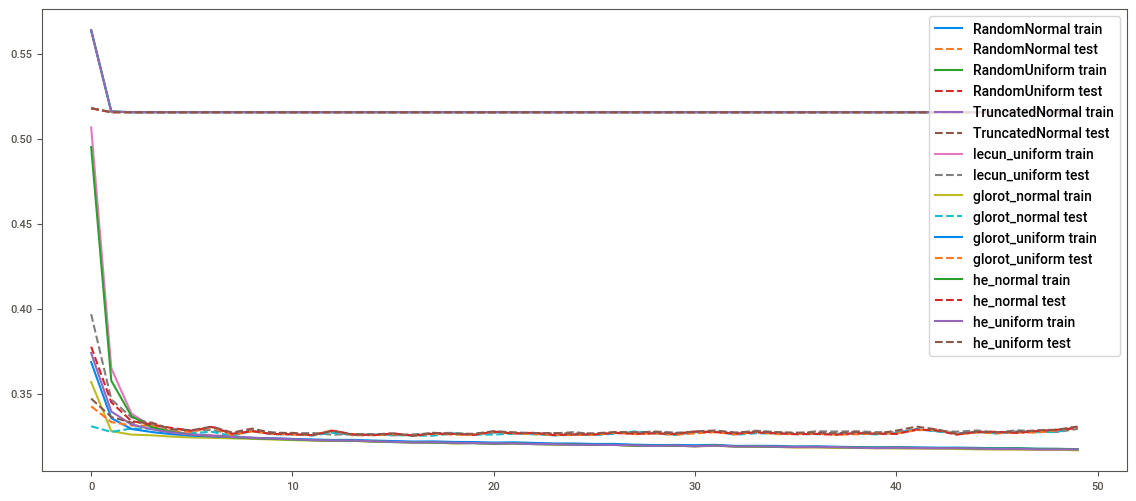

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(14,6))
for nombre, history in results.items():
  plt.plot(history.history['loss'], label=f'{nombre} train')
  plt.plot(history.history['val_loss'], label=f'{nombre} test', linestyle="--")
plt.legend()
plt.show();

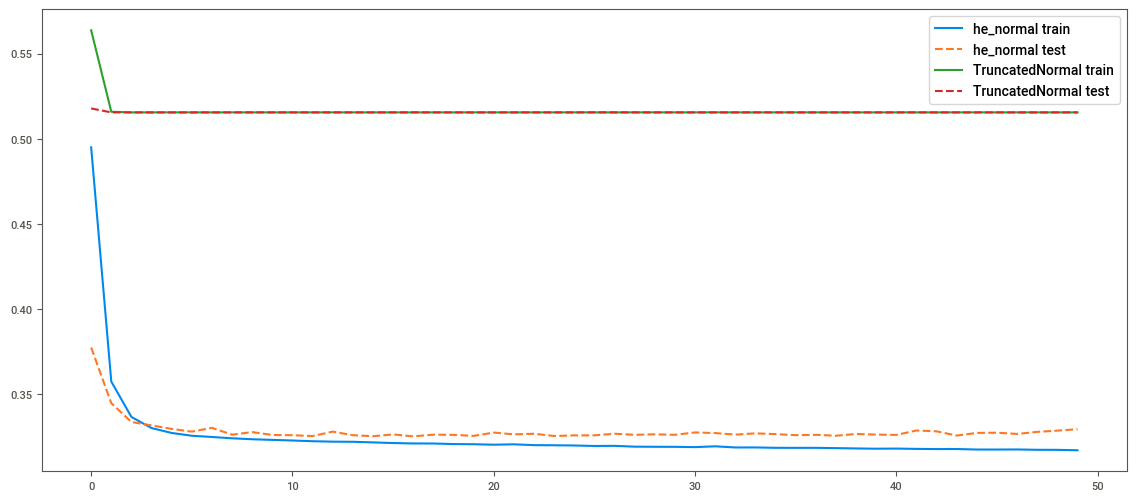

In [ ]:
# Seleccionar solo algunos inicializadores
selccion_inicializadores=['he_normal', 'TruncatedNormal']

plt.figure(figsize=(14,6))
for nombre in selccion_inicializadores:
  history=results[nombre]
  plt.plot(history.history['loss'], label=f'{nombre} train')
  plt.plot(history.history['val_loss'], label=f'{nombre} test', linestyle="--")
plt.legend()
plt.show();

In [ ]:
results

{'RandomNormal': <keras.src.callbacks.History at 0x7a48392a78e0>,
 'RandomUniform': <keras.src.callbacks.History at 0x7a483c3c0cd0>,
 'TruncatedNormal': <keras.src.callbacks.History at 0x7a483b8b9720>,
 'lecun_uniform': <keras.src.callbacks.History at 0x7a483b6d6d70>,
 'glorot_normal': <keras.src.callbacks.History at 0x7a483909ee30>,
 'glorot_uniform': <keras.src.callbacks.History at 0x7a4839bd8a90>,
 'he_normal': <keras.src.callbacks.History at 0x7a483f7df1c0>,
 'he_uniform': <keras.src.callbacks.History at 0x7a483f13f460>}

In [ ]:
modelo_3 = modelo_inicializadores(initializer = initializers.he_normal())

In [ ]:
modelo_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                960       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 16)                528       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 4)                 36        
                                                                 
 dense_75 (Dense)            (None, 2)                 10        
                                                                 
 dense_76 (Dense)            (None, 1)               

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo_3.fit(X_train,
           y_train,
           batch_size = 64,
           epochs = 50,
           validation_data = (X_test, y_test),
           verbose = 1)

Epoch 1/50
1915/1915 [==============================] - 9s 4ms/step - loss: 0.5649 - accuracy: 0.7871 - val_loss: 0.5179 - val_accuracy: 0.7889
Epoch 2/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.5159 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 3/50
1915/1915 [==============================] - 8s 4ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 4/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 5/50
1915/1915 [==============================] - 7s 4ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 6/50
1915/1915 [==============================] - 6s 3ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy: 0.7889
Epoch 7/50
1915/1915 [==============================] - 8s 4ms/step - loss: 0.5155 - accuracy: 0.7888 - val_loss: 0.5155 - val_accuracy:

In [ ]:
# Transformamos a data frame - loss
modelo_3_loss = pd.DataFrame(modelo_3.history.history)

In [ ]:
modelo_3_loss

In [ ]:
# Graficar todo
plt.figure(figsize=(12, 8))
# Subplot para la pérdida
plt.subplot(211)
plt.title('Loss')  # Leyenda para el subplot de pérdida
plt.plot(modelo_3_loss['loss'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_3_loss['val_loss'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
# Subplot para la precisión de la clasificación
plt.subplot(212)
plt.title('Classification Accuracy')  # Leyenda para el subplot de precisión de clasificación
plt.plot(modelo_3_loss['accuracy'], color='blue', label='train')  # Datos de entrenamiento
plt.plot(modelo_3_loss['val_accuracy'], color='orange', label='test')  # Datos de prueba
plt.legend()  # Mostrar leyenda
plt.show();

In [ ]:
# Predecimos en la train y test
predichos_train_3  = modelo_3.predict(X_train)
predichos_train_3 = (predichos_train>threshold)
predichos_test_3  = modelo_3.predict(X_test)
predichos_test_3 = (predichos_test>threshold)

In [ ]:
# Metricas
matrizconf_train_3 = metrics.confusion_matrix(y_train, predichos_train_3)
matrizconf_test_3 = metrics.confusion_matrix(y_test, predichos_test_3)
accuracy_train_3 = metrics.accuracy_score(y_train, predichos_train_3)
accuracy_test_3 = metrics.accuracy_score(y_test, predichos_test_3)
precision_train_3 = metrics.precision_score(y_train, predichos_train_3)
precision_test_3 = metrics.precision_score(y_test, predichos_test_3)
recall_train_3 = metrics.recall_score(y_train, predichos_train_3)
recall_test_3 = metrics.recall_score(y_test, predichos_test_3)
print("==============================================\n",
      "           METRICAS DE EVALUCACIÓN",
      "\n==============================================")
print("Matriz de confusión: Train:\n", matrizconf_train_3)
print("\n")
print("Matriz de confusión: tes:\n ", matrizconf_test_3)
print("\n")
print("Accuracy Train:", round(accuracy_train_3, 3))
print("Accuracy test:", round(accuracy_test_3, 3))
print("precision Train:", round(precision_train_3, 3))
print("precision test:", round(precision_test_3, 3))
print("recall  train:", round(recall_train_3, 3))
print("recall test:", round(recall_test_3, 3))

#### Cuarto modelo

In [ ]:
def modelo_optimizadores(optimizer):
  # Iniciamos la arquitectura
  modelo_4 = Sequential([
  # Agregamos una capa de entrada
  Dense(units = 64, activation = "relu", input_dim = X_train.shape[1]),
  # Agregamos la primera capa oculta,
  Dense(units = 32,   activation = "relu"),
  # Agregamos la segunda capa oculta
  Dense(units = 16,   activation = "relu"),
  # Agregamos la tercera capa oculta
  Dense(units = 8 ,  activation = "relu"),
  # Agregamos la cuarta capa oculta
  Dense(units = 4,   activation = "relu"),
  # Agregamos la quinta capa oculta
  Dense(units = 2,   activation = "sigmoid"),
  # Agregamos la capa se salida
  Dense(units = 1,   activation = "sigmoid")
  ])
  modelo_4.compile(optimizer = optimizer,
                  loss = "binary_crossentropy",
                  metrics = ['accuracy'])
  return modelo_4

In [ ]:
optimizador_dicc = {
    "Adam": optimizers.Adam(),  # Cambio realizado aquí
    "Stocastic Gradient Descendent": optimizers.SGD(),
    "RMSprop": optimizers.RMSprop(),
    "Adagrad": optimizers.Adagrad(),
    "Adadelta": optimizers.Adadelta(),
    "Adamax": optimizers.Adamax(),
    "Nadam": optimizers.Nadam(),
    "Ftrl": optimizers.Ftrl(),
}

In [ ]:
#Almacenar el historail de entrenamiento
history_dicc = {}

In [ ]:
# Entrenar modelo y guardar resultados
for nombre, optimizador_dicc in optimizador_dicc.items():
  modelo_4 = modelo_optimizadores(optimizador_dicc)
  history = modelo_3.fit(X_train,
                        y_train,
                        epochs = 50,
                        batch_size = 64,
                        validation_data = (X_test, y_test),
                        verbose = 1)
  history_dicc[nombre] = history
  print(f"\nEntrennamiento con el optimizador {nombre} completado\n")

In [ ]:
#Graficar
epocas = 50
epocas_range = range(1,epocas+1)

plt.figure(figsize=(16,8))

for nombre_optimizador, history in history_dicc.items():
  plt.plot(epocas_range, history.history['accuracy'], label=f'Entrenamiento {nombre_optimizador}')
  plt.plot(epocas_range, history.history['val_accuracy'], label=f'Validacion {nombre_optimizador}', linestyle="--")
plt.legend()
plt.show();

In [ ]:
modelo_4 = modelo_optimizadores(optimizer = optimizers.RMSprop())

In [ ]:
modelo_4.summary()

In [ ]:
modelo_4.fit(X_train,
             y_train,
             epochs = 50,
             batch_size = 64,
             verbose = 1,
             validation_data = (X_test, y_test))

In [ ]:
# Transformamos a data frame - loss
modelo_4_loss = pd.DataFrame(modelo_4.history.history)

In [ ]:
modelo_4_loss

In [ ]:
# Predecimos en la train y test
predichos_train_4  = modelo_4.predict(X_train)
predichos_train_4 = (predichos_train>threshold)
predichos_test_4 = modelo_4.predict(X_test)
predichos_test_4 = (predichos_test>threshold)

In [ ]:
# Metricas
matrizconf_train_4 = metrics.confusion_matrix(y_train, predichos_train_4)
matrizconf_test_4 = metrics.confusion_matrix(y_test, predichos_test_4)
accuracy_train_4 = metrics.accuracy_score(y_train, predichos_train_4)
accuracy_test_4 = metrics.accuracy_score(y_test, predichos_test_4)
precision_train_4 = metrics.precision_score(y_train, predichos_train_4)
precision_test_4 = metrics.precision_score(y_test, predichos_test_4)
recall_train_4 = metrics.recall_score(y_train, predichos_train_4)
recall_test_4 = metrics.recall_score(y_test, predichos_test_4)
print("==============================================\n",
      "           METRICAS DE EVALUCACIÓN",
      "\n==============================================")
print("Matriz de confusión: Train:\n", matrizconf_train_4)
print("\n")
print("Matriz de confusión: tes:\n ", matrizconf_test_4)
print("\n")
print("Accuracy Train:", round(accuracy_train_4, 3))
print("Accuracy test:", round(accuracy_test_4, 3))
print("precision Train:", round(precision_train_4, 3))
print("precision test:", round(precision_test_4, 3))
print("recall  train:", round(recall_train_4, 3))
print("recall test:", round(recall_test_4, 3))

# 1.- Aplicar deteccion de nulos y corregirlos en base a su criterio

- Al inicio no se encontraron valores nulos, se precedió con normalidad.

# 2.- Aplicar deteccion de outliers y corregirlos en base a su criterio

- Usamos la función "handle_outliers" para tratar los outliers.

# 3.- Presentar graficos de visualizacion que representen datos categoricos y datos cuantitativos

- Generamos 2 gráficas referente al promedio de cada 0 y 1 en el feature "Exited", y a la distribución de balanceo de los 0 y 1, además se realizó un reporte automático con sweetviz.

# 4.- Eliminacion de campos irrelevantes con justificacion

- Se eliminaron los siguientes features: 'Tenure_Age', 'Bal_sal', 'Cred_Bal_Sal', 'Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'EstimatedSalary', por la razón de que al realizar las transformaciones no generaban algún valor al modelo y tenían más del 60% de valores perdidos.

# 5.- Aplicacion de tecnicas como SMOTE, estandarizacion y dummies y generacion de datasets independientes segun la tecnica aplicada

- No fue necesario incluir alguna técnica de balanceo de datos, los datos no se encontraban con un desbalanceo excesivo, en este caso lo que se realizó fue ajustar el punto de corte para que el performance dle modelo sea mejor

# 6.- Creacion de modelos usando las distintas tecnicas mencionadas y usando metricas adecuadas

- Se usaron la matriz de confusión, el accuracy, precision y recall para evaluar el performance del modelo (cabe recalcar que estas dos últimas métricas nos van a ayudar más para identificar los casos de salida del usuario).

# 7.- seleccion del mejor modelo

- Se realizaron 4 modelos, de los cuales todos tuvieron cuasi el mismo rendimiento. Se podría usar cualquiera de ellos.